In [49]:
import numpy as np
import pandas as pd
from os import listdir
import random
from random import seed
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn_pandas import CategoricalImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import confusion_matrix, precision_score, recall_score, \
average_precision_score, precision_recall_curve
seed(1121)

In [4]:
sampl = pd.read_csv('../input/training_setA/training/p000001.psv', sep='|')
sampl.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0


In [8]:
a_traincsv = listdir('../input/training_setA/training/')
b_traincsv = listdir('../input/training_setB/training_setB/')

with open("train.psv","wb") as fout:
    
    for i,csv in enumerate(a_traincsv):
        if i == 0:
            with open('../input/training_setA/training/' + csv, "rb") as f:
                fout.write(f.read()) 
        with open('../input/training_setA/training/' + csv, "rb") as f:
            next(f)
            fout.write(f.read())
      
    for i,csv in enumerate(b_traincsv):
        if i <10000:
            with open('../input/training_setB/training_setB/' + csv, "rb") as f:
                next(f)
                fout.write(f.read())

In [9]:
train = pd.read_csv('/kaggle/working/train.psv', sep ='|')
train.shape

(1168484, 41)

In [10]:
with open("validation.psv","wb") as fout:
    
    for i,csv in enumerate(b_traincsv):
        if i >=10000 and i <15000:
            if i == 10000:
                with open('../input/training_setB/training_setB/' + csv, "rb") as f:
                    fout.write(f.read())
                    
            with open('../input/training_setB/training_setB/' + csv, "rb") as f:
                next(f)
                fout.write(f.read())

In [11]:
validation = pd.read_csv('/kaggle/working/validation.psv', sep ='|')
validation.shape

(191187, 41)

In [12]:
with open("test.psv","wb") as fout:

    for i,csv in enumerate(b_traincsv):
        if i >=15000:
            if i == 15000:
                with open('../input/training_setB/training_setB/' + csv, "rb") as f:
                    fout.write(f.read())  
            with open('../input/training_setB/training_setB/' + csv, "rb") as f:
                next(f)
                fout.write(f.read())

In [13]:
test = pd.read_csv('/kaggle/working/test.psv', sep ='|')
test.shape

(192628, 41)

In [15]:
train.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

# Distribution of Dependent Variable

In [16]:
train['SepsisLabel'].value_counts()

0    1146063
1      22421
Name: SepsisLabel, dtype: int64

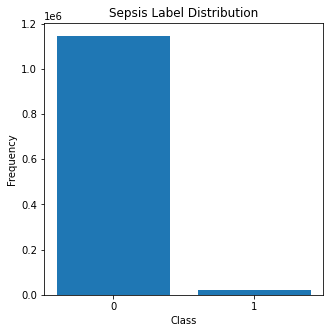

In [17]:
rcParams['figure.figsize'] = 5, 5

plt.bar(train['SepsisLabel'].value_counts().index,
        train['SepsisLabel'].value_counts())
plt.xticks([0,1])
plt.xlabel('Class')
plt.title('Sepsis Label Distribution')
_ = plt.ylabel('Frequency')

As we can see from the plot, it is a case of severe class imbalance . There are multiple methods that we could try to balance it (Over sampling or Undersampling) or even proceed without balancing but change the evaluation metric to average precision or roc_auc_sore

# Check For null in Features/ Independent variables

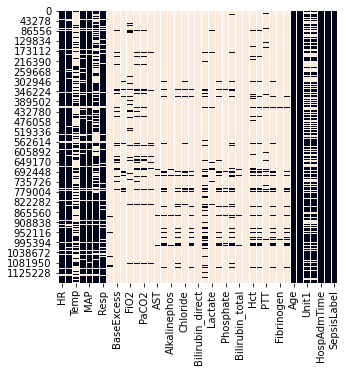

In [18]:
sns.heatmap(train.isnull(), cbar=False)

In [19]:
missing = (train.isnull().sum() / train.shape[0]) * 100
missing

HR                   9.154597
O2Sat               12.740354
Temp                66.214856
SBP                 14.827760
MAP                 11.711928
DBP                 37.095245
Resp                13.464455
EtCO2               97.517381
BaseExcess          92.878807
HCO3                94.499454
FiO2                89.666268
pH                  91.531848
PaCO2               93.355493
SaO2                96.047186
AST                 98.418720
BUN                 92.696348
Alkalinephos        98.441143
Calcium             94.429363
Chloride            94.172791
Creatinine          93.720924
Bilirubin_direct    99.824645
Glucose             84.505222
Lactate             97.077410
Magnesium           93.186471
Phosphate           95.636911
Potassium           90.168971
Bilirubin_total     98.597157
TroponinI           99.326050
Hct                 90.146463
Hgb                 92.119875
PTT                 96.407396
WBC                 93.209663
Fibrinogen          99.307907
Platelets 

We see that most of the columns have 90% + missing data. There are multiple ways of dealing with it. To establish a concrete baseline, I have decided to remove features with 90 % or more missing data.

Text(0.5, 1.0, 'Percentage of missing data in each feature')

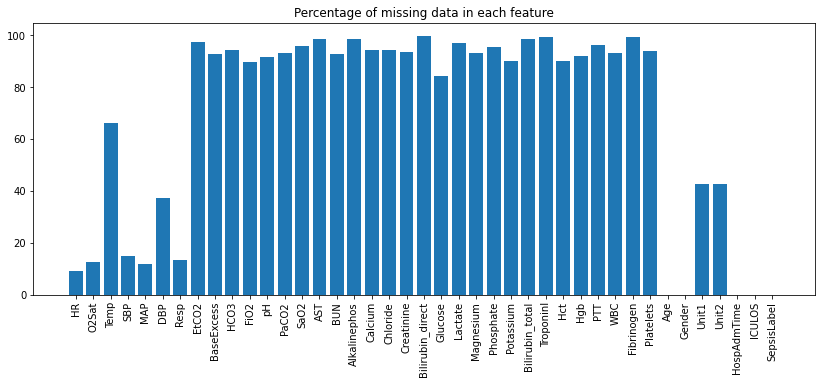

In [20]:
rcParams['figure.figsize'] = 14, 5
_ = plt.bar(missing.index, missing)
_ = plt.xticks(missing.index, rotation=90)

plt.title("Percentage of missing data in each feature")

In [21]:
selected_cols = list(missing[missing < 90].index)
selected_cols

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'FiO2',
 'Glucose',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel']

In [22]:
filter_train = train[selected_cols]
filter_train.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.84,1,0.0,1.0,-62.87,1,0
1,65.0,100.0,36.9,113.0,72.0,51.0,14.0,NaN,234.0,74.84,1,0.0,1.0,-62.87,2,0
2,62.0,99.5,37.1,111.0,71.0,51.0,12.0,NaN,NaN,74.84,1,0.0,1.0,-62.87,3,0
3,81.0,99.0,37.1,97.0,66.0,47.0,10.0,NaN,NaN,74.84,1,0.0,1.0,-62.87,4,0
4,59.0,99.0,37.2,91.0,55.0,40.0,10.0,NaN,240.0,74.84,1,0.0,1.0,-62.87,5,0


# Univariate plots

In [23]:
categorical = filter_train.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True

In [24]:
cat_vars = list(categorical[categorical].index)
cont_vars = list(categorical[~categorical].index)
cont_vars.pop(-1)

'SepsisLabel'

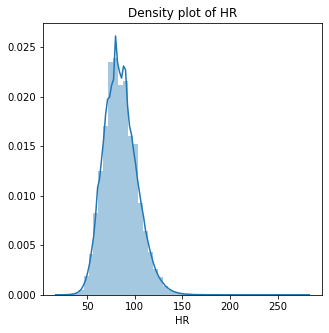

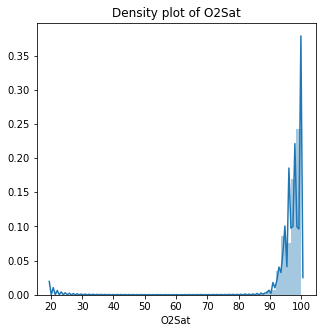

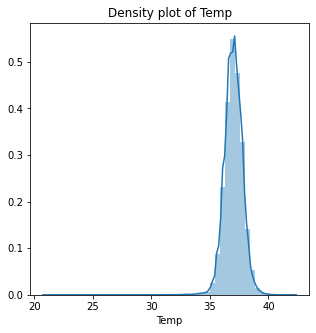

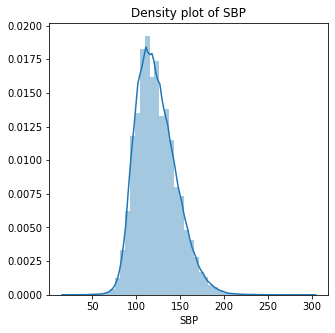

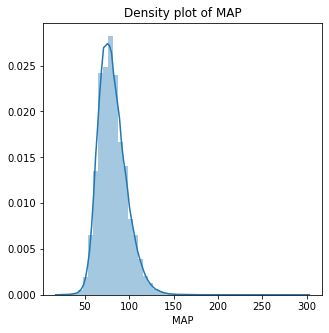

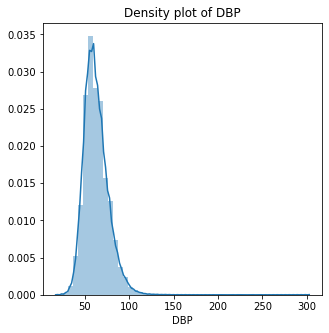

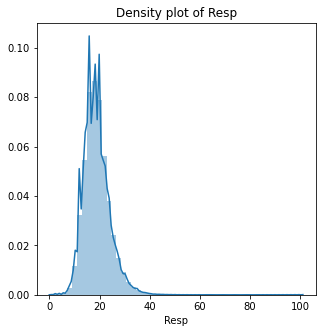

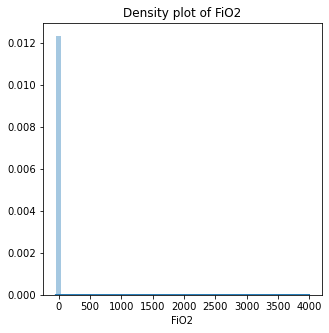

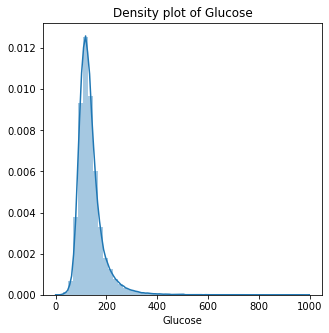

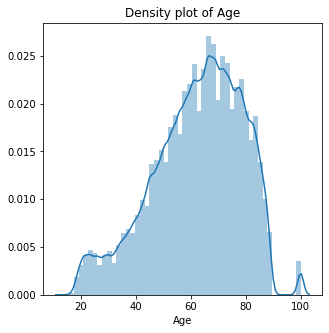

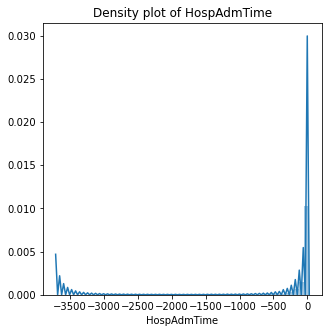

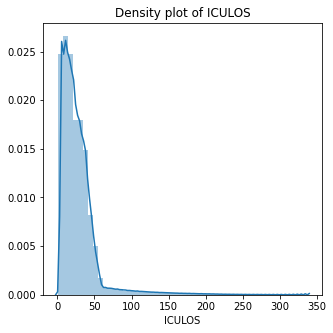

In [25]:
rcParams['figure.figsize'] = 5, 5
for i,var in enumerate(cont_vars):
    plt.figure(i)
    plt.title("Density plot of " + str(var))
    sns.distplot(filter_train[var].dropna(), axlabel=var);

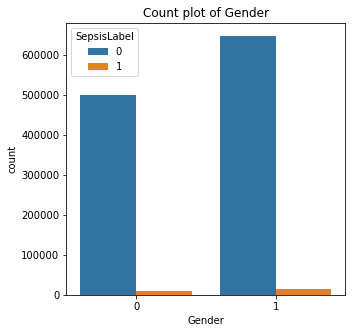

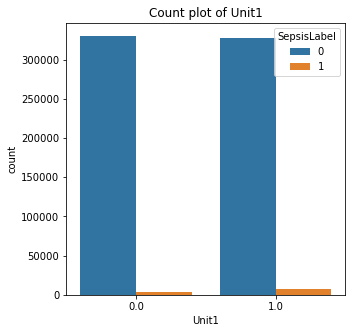

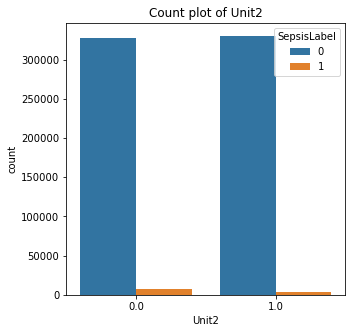

In [26]:
for i,var in enumerate(cat_vars):
    plt.figure(i)
    plt.title("Count plot of " + str(var))
    sns.countplot(filter_train[var].dropna(), hue='SepsisLabel', data= filter_train);

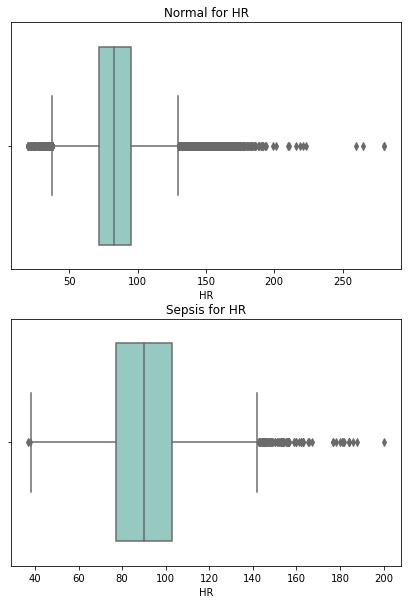

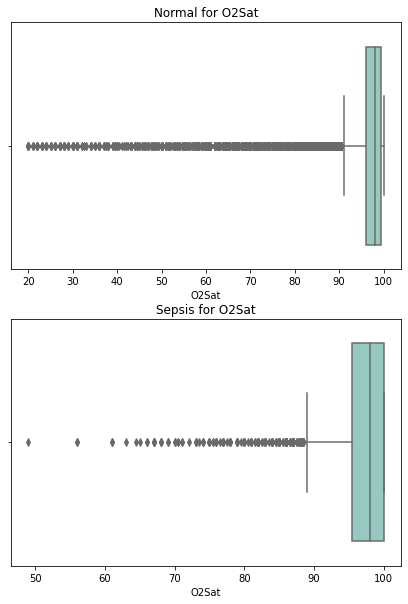

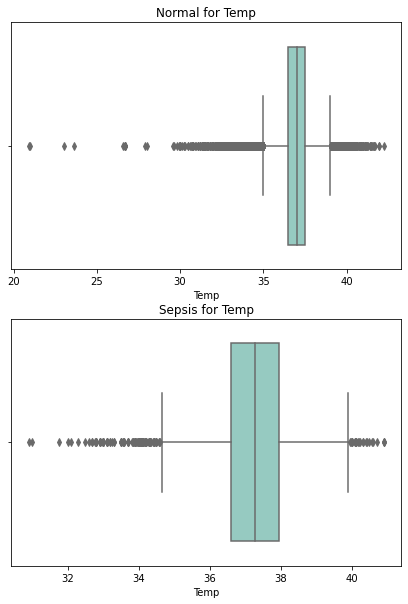

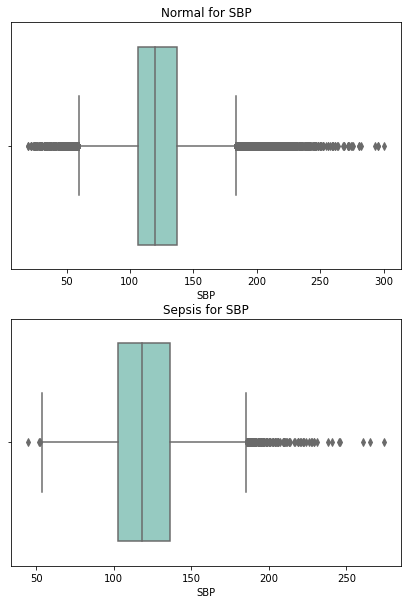

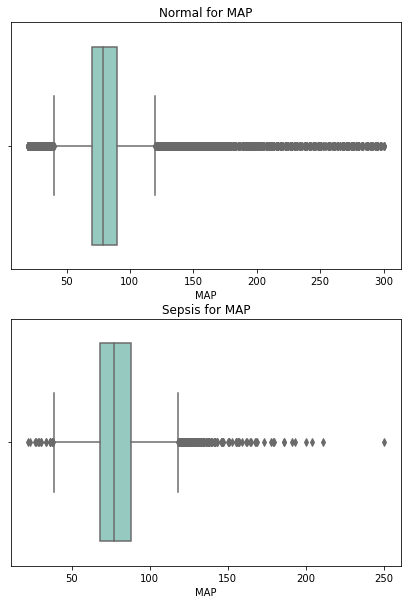

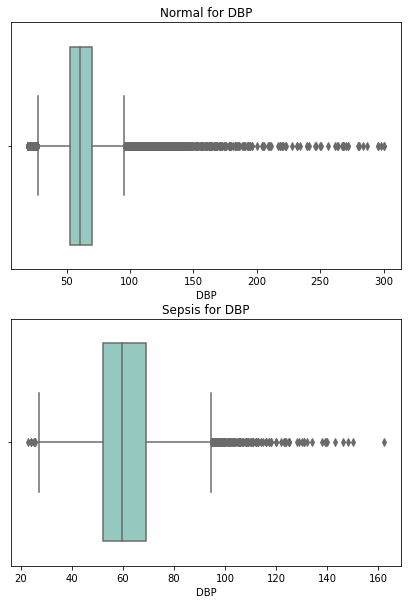

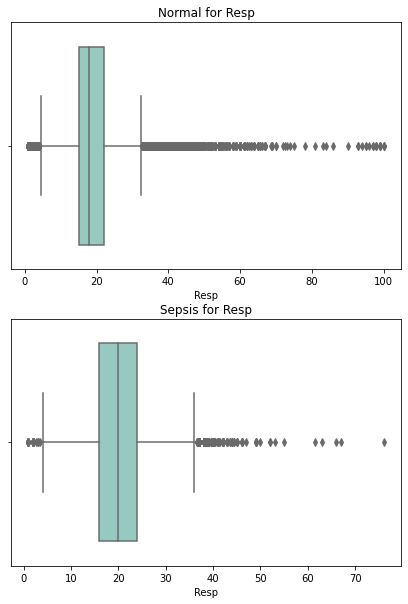

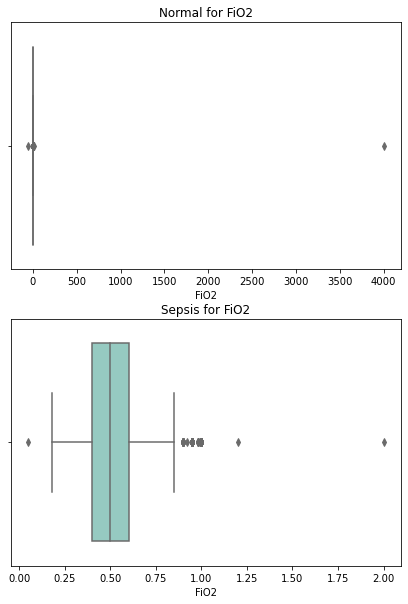

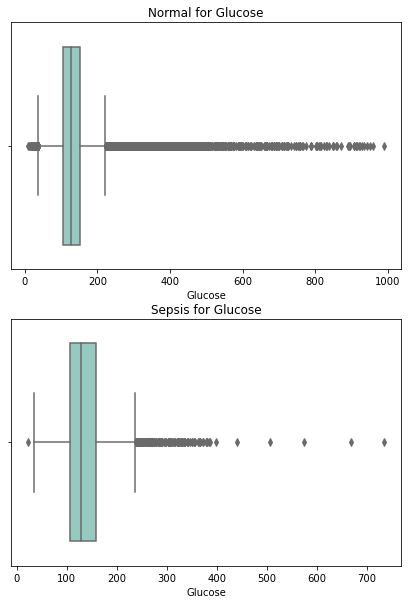

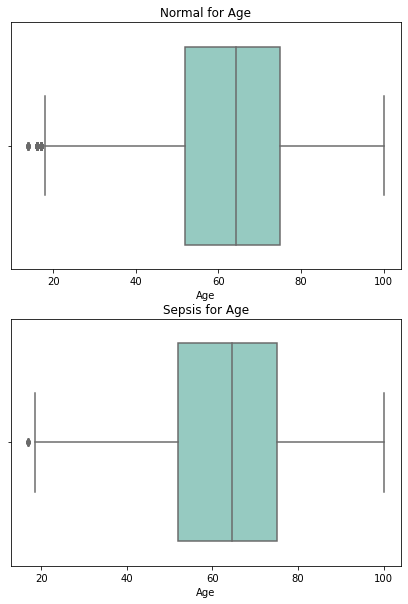

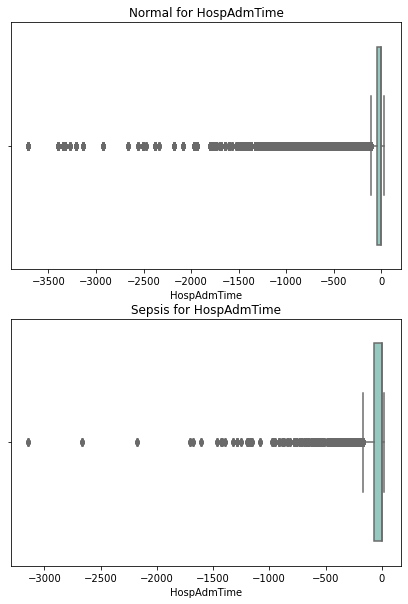

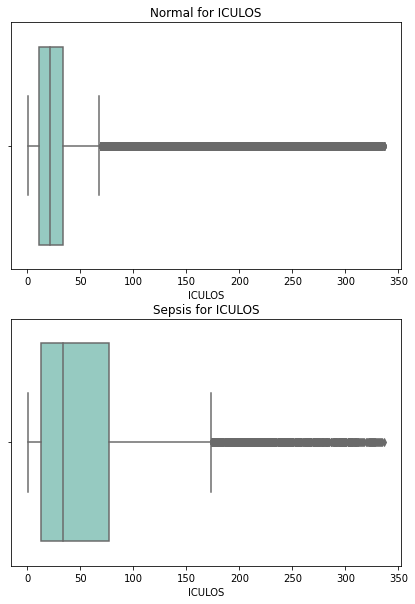

In [27]:
for i,var in enumerate(cont_vars):
    temp = filter_train[[var,'SepsisLabel']].dropna()
    temp1 = temp[temp['SepsisLabel']==0]
    temp2 = temp[temp['SepsisLabel']==1]
    fig, ax = plt.subplots(2, 1, figsize=(7, 10))

    sns.boxplot(temp1[var], ax=ax[0], palette='Set3')
    sns.boxplot(temp2[var], ax=ax[1], palette='Set3')
    ax[0].set_title("Normal for " + var)
    ax[1].set_title("Sepsis for " + var)

# Baseline
The Features which are used for basleline. No Feature engineering has been done yet

In [28]:
features = cont_vars + cat_vars
features

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'FiO2',
 'Glucose',
 'Age',
 'HospAdmTime',
 'ICULOS',
 'Gender',
 'Unit1',
 'Unit2']

In [29]:
X_train = filter_train[features]
y_train = filter_train['SepsisLabel']

In [30]:
categorical = X_train.dtypes == object
categorical['Unit1'] = True
categorical['Unit2'] = True
categorical['Gender'] = True

In [31]:
cont_scale_pipeline = make_pipeline(SimpleImputer(strategy = "median"), 
                                    StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy = "constant", 
                                           fill_value = 999), 
                             OneHotEncoder(handle_unknown="ignore"))
preprocess_trans_scale = make_column_transformer((cont_scale_pipeline, 
                                                  ~categorical), 
                                                 (cat_pipeline, categorical))

In [32]:
logistic_pipe_scale = make_pipeline(preprocess_trans_scale, 
                                    LogisticRegression(solver='lbfgs') )
rf_pipe_scale = make_pipeline(preprocess_trans_scale, RandomForestClassifier())
svc_pipe_scale = make_pipeline(preprocess_trans_scale, SVC())
gb_pipe_scale = make_pipeline(preprocess_trans_scale, GradientBoostingClassifier())
dt_pipe_scale = make_pipeline(preprocess_trans_scale, DecisionTreeClassifier() )
gmm_pipe_scale = make_pipeline(preprocess_trans_scale, GaussianMixture(n_components=2))
mlp_pipe_scale = make_pipeline(preprocess_trans_scale, MLPClassifier() )

In [33]:
scores_logistic_pipe_scale = cross_validate(logistic_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])



scores_rf_pipe_scale = cross_validate(rf_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])



scores_gb_pipe_scale = cross_validate(gb_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])
scores_dt_pipe_scale = cross_validate(dt_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])


scores_gmm_pipe_scale = cross_validate(gmm_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])

scores_mlp_pipe_scale = cross_validate(mlp_pipe_scale, X_train, 
                                             y_train, 
                                             cv=StratifiedKFold(3, shuffle=True)
                                             ,scoring=["average_precision", 
                                                       "roc_auc", "precision", 
                                                       "recall"])

In [34]:
log_df = pd.DataFrame(scores_logistic_pipe_scale)
log_df['model'] = 'LogisticRegression'

dt_df = pd.DataFrame(scores_dt_pipe_scale)
dt_df['model'] = 'DecisionTree'

gb_df = pd.DataFrame(scores_gb_pipe_scale)
gb_df['model'] = 'GradientBoosting'

rf_df = pd.DataFrame(scores_rf_pipe_scale)
rf_df['model'] = 'RandomForest'

gmm_df = pd.DataFrame(scores_gmm_pipe_scale)
gmm_df['model'] = 'GMM'

mlp_df = pd.DataFrame(scores_mlp_pipe_scale)
mlp_df['model'] = 'MLP'




results = pd.concat([log_df, dt_df, gb_df, rf_df, gmm_df, mlp_df])

In [35]:
results

,fit_time,score_time,test_average_precision,test_roc_auc,test_precision,test_recall,model
0,5.529038,1.069813,0.070981,0.728058,0.128440,0.001873,LogisticRegression
1,3.817799,1.061300,0.070425,0.720160,0.147059,0.002007,LogisticRegression
2,4.882223,1.041753,0.073905,0.729072,0.210526,0.002676,LogisticRegression
0,19.049990,1.167436,0.124527,0.670440,0.315054,0.355900,DecisionTree
1,18.034824,1.191609,0.126143,0.672341,0.316316,0.359781,DecisionTree
2,19.423164,1.127995,0.128728,0.672859,0.323053,0.360230,DecisionTree
0,238.750813,2.185773,0.120075,0.791221,0.495798,0.007894,GradientBoosting
1,238.244470,2.185200,0.119200,0.790759,0.688312,0.007091,GradientBoosting
2,233.738056,2.101578,0.110887,0.789477,0.535211,0.005085,GradientBoosting
0,279.325882,23.631075,0.500790,0.941216,0.913621,0.073588,RandomForest


# Feature Engineering
## Heart Rate
Heart rate for a healthy adult is between 60 and 100. For a healthy infant it is between 70 and 190. Creating a new feature custom_hr , which is categorical variable having three values Normal, Abnormal and Missing

In [36]:
def feature_engineer_hr(train):
    train.loc[(train['HR'] >= 100) & (train['Age'] >= 10 ),
            'custom_hr'] = 'abnormal'
    train.loc[(train['HR'] < 100) & (train['HR'] > 60) & (train['Age'] >= 10 ),
            'custom_hr'] = 'normal'
    train.loc[(train['HR'] >= 70) & (train['HR'] < 190) & (train['Age'] < 10 ),
            'custom_hr'] = 'normal'
    train.loc[((train['HR'] < 70) | (train['HR'] >= 190)) & (train['Age'] < 10 ),
            'custom_hr'] = 'abnormal'
    train['custom_hr'].fillna('Missing', inplace=True)
    return train

## Temperature
Temperature for a healthy human being is between 36.4 degree C to 37.6 degree C. Creating a new feature custom_temp , which is categorical variable having three values Normal, Abnormal and Missing

In [37]:
def feature_engineer_temp(train):
    train.loc[(train['Temp'] >= 36.4) & (train['Temp'] < 37.6), 
            'custom_temp'] = 'normal'
    train.loc[(train['Temp'] < 36.4) | (train['Temp'] >= 37.6), 
            'custom_temp'] = 'abnormal'

    train['custom_temp'].fillna('Missing', inplace=True)
    return train

## Age
Categorizing patient based on age to old, infant and Child/adult

In [38]:
def featuer_engineer_age(train):
    train.loc[train['Age'] >=65, 'custom_age'] = 'old'
    train.loc[train['Age'] <1, 'custom_age'] = 'infant'
    train.loc[(train['Age'] >=1) & (train['Age'] <65), 
            'custom_age'] = 'child/adult'
    return train

## O2Stat
O2Stat for a healthy adult is between 90 and 100 for healthy human beings. Create a new categorical variable custom_o2stat with levels normal, abnormal and missing

In [39]:
def feature_engineer_o2stat(train):
    train.loc[(train['O2Sat'] >= 90) & (train['O2Sat'] < 100), 
            'custom_o2stat'] = 'normal'
    train.loc[(train['O2Sat'] < 90) & (train['O2Sat'] >= 0), 
            'custom_o2stat'] = 'abnormal'

    train['custom_o2stat'].fillna('Missing', inplace=True)
    return train

## SBP and DBP
SBP stands for Systolic blood pressure, It is the upper number while measuring Blood pressure. DBP stands for Diastolic blood pressure , It is the lower number while measuring Blood pressure. Using both these columns to categorize blood pressure as low, normal, elevated , high and missing

In [40]:
def feature_engineer_blood_pressure(train):
    train.loc[(train['SBP'] <90) & (train['DBP'] <60), 'custom_bp'] = 'low'

    train.loc[(train['SBP'].between(90,120, inclusive=True)) & 
            (train['DBP'].between(60,80, inclusive=True)), 
            'custom_bp'] = 'normal'


    train.loc[(train['SBP'].between(120,140, inclusive=True)) & 
            (train['DBP'].between(80,90, inclusive=True)), 
            'custom_bp'] = 'elevated'


    train.loc[(train['SBP'] > 140 ) & 
            (train['DBP'] > 90 ), 'custom_bp'] = 'high'

    train['custom_bp'].fillna('Missing', inplace=True)
    return train

## Respiration Rate
Respiration rate for healthy adults is between 12 and 20. Categorizing respiratory rate as normal and abnormal based on thresholds.

In [41]:
def feature_engineer_resp_rate(train):
    train.loc[(train['Resp'].between(30,60)) & (train['Age'] <1), 
            'custom_resp'] = 'normal'
    train.loc[((train['Resp'] < 30) | (train['Resp'] > 60)) & 
             (train['Age'] <1) ,'custom_resp'] = 'abnormal'


    train.loc[(train['Resp'].between(24,40)) & (train['Age'].between(1,3)), 
            'custom_resp'] = 'normal'
    train.loc[((train['Resp'] < 24) | (train['Resp'] > 40)) & 
             (train['Age'].between(1,3)) ,'custom_resp'] = 'abnormal'


    train.loc[(train['Resp'].between(22,34)) & (train['Age'].between(3,6)), 
            'custom_resp'] = 'normal'
    train.loc[((train['Resp'] < 22) | (train['Resp'] > 34)) & 
             (train['Age'].between(3,6)) ,'custom_resp'] = 'abnormal'


    train.loc[(train['Resp'].between(18,30)) & (train['Age'].between(6,12)), 
            'custom_resp'] = 'normal'
    train.loc[((train['Resp'] < 18) | (train['Resp'] > 30)) & 
             (train['Age'].between(6,12)) ,'custom_resp'] = 'abnormal'


    train.loc[(train['Resp'].between(12,20)) & (train['Age'] >12), 
            'custom_resp'] = 'normal'
    train.loc[((train['Resp'] < 12) | (train['Resp'] > 20)) & (train['Age'] >12),
            'custom_resp'] = 'abnormal'

    train['custom_resp'].fillna('Missing', inplace=True)


    return train

## Transform Train and Validation sets

In [43]:
train = featuer_engineer_age(train)
train = feature_engineer_blood_pressure(train)
train = feature_engineer_hr(train)
train = feature_engineer_o2stat(train)
train = feature_engineer_temp(train)
train = feature_engineer_resp_rate(train)



val = featuer_engineer_age(validation)
val = feature_engineer_blood_pressure(validation)
val = feature_engineer_hr(validation)
val = feature_engineer_o2stat(validation)
val = feature_engineer_temp(validation)
val = feature_engineer_resp_rate(validation)

# Intution Based Feature Selection
According to the CDC website heart rate, fever and BP are the most important signs of sepsis. So selecting these features with the same intution

In [44]:
filtered_columns = ['Gender', 'custom_hr', 'custom_temp','custom_age', 
                    'custom_o2stat', 'custom_bp','custom_resp' ,'ICULOS', 
                    'HospAdmTime']

X_train  = train[filtered_columns]
y_train = train['SepsisLabel']

X_val  = val[filtered_columns]
y_val = val['SepsisLabel']

categorical = X_train.dtypes == object

categorical['Gender'] = True

# Defining the Pipeline

In [45]:
cat_pipeline = make_pipeline( OneHotEncoder(handle_unknown="ignore"))
cont_scale_pipeline = make_pipeline(SimpleImputer(strategy = "median"),
                                    StandardScaler())

preprocess_trans_scale = make_column_transformer((cont_scale_pipeline, 
                                                  ~categorical), 
                                                 (cat_pipeline, categorical))

In [46]:
def score_model(model, metric_list, y_true, y_pred):
    metric_dict = {'precision' :  precision_score, 'recall' : recall_score, 
                 'confusion_matrix' : confusion_matrix, 
                 'avg_precision': average_precision_score}
    df = pd.DataFrame()
    df['model'] = [model]
    for metric in metric_list:
        df[metric] = [metric_dict[metric](y_true, y_pred)]
    return df

# Logistic Regression

In [47]:
log_pipe_scale = make_pipeline(preprocess_trans_scale, 
                               LogisticRegression(C=0.01, solver = 'lbfgs',
                                                  dual=False) )

log_model = log_pipe_scale.fit(X_train, y_train)

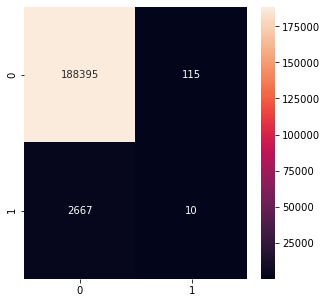

In [50]:
pred = log_pipe_scale.predict(X_val)
conf_matrix = confusion_matrix(y_val, pred)

sns.heatmap(conf_matrix, annot=True, fmt="d");

In [51]:
score_model('Logistic_regression', ['recall','precision', 'avg_precision'],
            y_val, pred)

,model,recall,precision,avg_precision
0,Logistic_regression,0.003736,0.08,0.014249


In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,pred)

0.9803490823120818

In [52]:
df = pd.DataFrame(log_pipe_scale.predict_proba(X_val))

df['actual'] = y_val
df.loc[(df[1] >=0.4), 'pred'] = 1 
df.loc[(df[1] <0.4), 'pred'] = 0

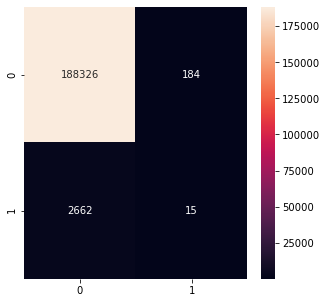

In [53]:
conf_matrix = confusion_matrix(df['actual'], df['pred'])

sns.heatmap(conf_matrix, annot=True, fmt="d");


In [54]:
score_model('Logistic_regression', ['recall','precision','avg_precision'], 
            df['actual'], df['pred'])

,model,recall,precision,avg_precision
0,Logistic_regression,0.005603,0.075377,0.014346


In [55]:
eval_df = pd.DataFrame(log_pipe_scale.predict_proba(X_val))

eval_df['actual'] = y_val

def eval_threshold(eval_df, t_list):
    output_df = pd.DataFrame()
    avg_pre_list = []
    for threshold in t_list:
        eval_df.loc[(eval_df[1] >=threshold), 'pred'] = 1 
        eval_df.loc[(eval_df[1] <threshold), 'pred'] = 0 
        avg_pre_list.append(average_precision_score(eval_df['actual'], 
                                                    eval_df['pred']))
    output_df['threshold'] = t_list
    output_df['avg_precision'] = avg_pre_list
    return output_df
    
comp = eval_threshold(eval_df, list(np.arange(0,1,0.05)))

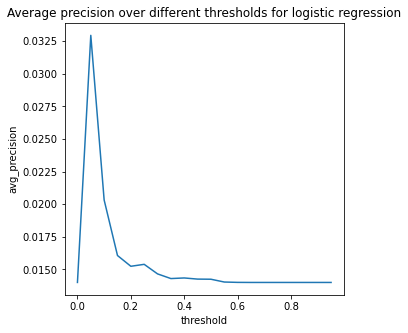

In [56]:
ax=sns.lineplot(comp['threshold'], comp['avg_precision'])
_=ax.set_title('Average precision over different thresholds for logistic regression')

# Grid Search

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {'logisticregression__C': [0.1, 0.01, 0.5, 1],
             'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 
                                           'sag', 'saga']}
grid = GridSearchCV(log_pipe_scale, param_grid, cv=3, scoring = 'average_precision', n_jobs = 6)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Gender           False
custom_hr        False
custom_temp      False
custom_age       False
custom_o2stat    False
custom_bp        False
custom_resp      False
ICULOS            True
HospAdmTime       True
dtype...
                                                                         Gender            Tr

In [60]:
print(grid.best_params_)

{'logisticregression__C': 0.01, 'logisticregression__solver': 'lbfgs'}


# Decision Tree

In [61]:
dt_pipe_scale = make_pipeline(preprocess_trans_scale, DecisionTreeClassifier() )

dt_model = dt_pipe_scale.fit(X_train, y_train)

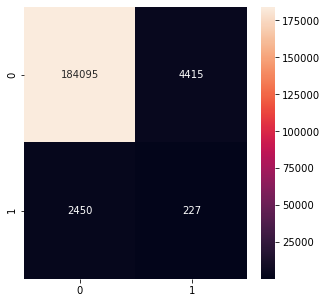

In [62]:
pred = dt_model.predict(X_val)
conf_matrix = confusion_matrix(y_val, pred)

sns.heatmap(conf_matrix, annot=True, fmt="d");

In [63]:
score_model('Decision_Tree', ['recall','precision', 'avg_precision'],
            y_val, pred)

,model,recall,precision,avg_precision
0,Decision_Tree,0.084796,0.048901,0.016961


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, \
average_precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
import seaborn as sns
from subprocess import call
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [67]:
cat_names = preprocess_trans_scale.fit(X_train). \
            named_transformers_['pipeline-2'].named_steps['onehotencoder']

feature_list = list(cat_names.get_feature_names())
feature_list.extend(['ICULOS', 
                    'HospAdmTime'])


export_graphviz(DecisionTreeClassifier(max_leaf_nodes=15).fit( \
    preprocess_trans_scale.fit_transform(X_train), y_train) , 
                out_file='dt.dot',
                feature_names =feature_list ,class_names = ['normal','sepsis'],
                rounded = True, proportion = False, precision = 2
               )
call(['dot', '-Tpng', 'dt.dot', '-o', 'dt.png', '-Gdpi=600'])

Image(filename = 'dt.png', width =400, height = 400)

In [68]:
param_grid = { 'decisiontreeclassifier__max_depth': range(1, 7),
                'decisiontreeclassifier__max_leaf_nodes':range(2, 20)}
grid = GridSearchCV(dt_pipe_scale, param_grid, cv=3, n_jobs = 6, scoring= 'recall')
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Gender           False
custom_hr        False
custom_temp      False
custom_age       False
custom_o2stat    False
custom_bp        False
custom_resp      False
ICULOS            True
HospAdmTime       True
dtype...
                                                                                          One

In [69]:
print(grid.best_params_)

{'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__max_leaf_nodes': 18}


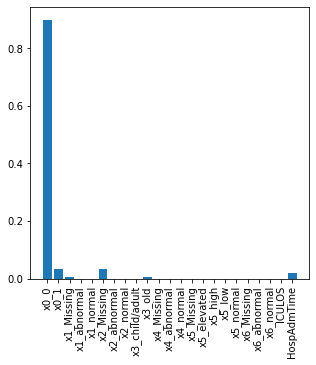

In [94]:
imp_list = dt_model.named_steps['decisiontreeclassifier'].feature_importances_
_ = plt.bar(feature_list,imp_list)
_ = plt.xticks(feature_list, rotation=90)

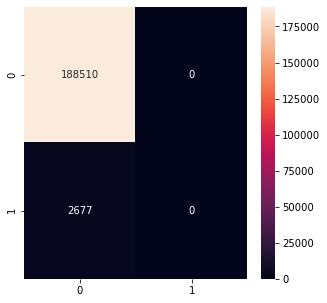

In [95]:
dt_pipe_scale = make_pipeline(preprocess_trans_scale, DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17) )

dt_model = dt_pipe_scale.fit(X_train, y_train)


pred = dt_pipe_scale.predict(X_val)
conf_matrix = confusion_matrix(y_val, pred)

sns.heatmap(conf_matrix, annot=True, fmt="d");

In [96]:
eval_df = pd.DataFrame(dt_pipe_scale.predict_proba(X_val))

eval_df['actual'] = y_val

def eval_threshold(eval_df, t_list):
    output_df = pd.DataFrame()
    avg_pre_list = []
    for threshold in t_list:
        eval_df.loc[(eval_df[1] >=threshold), 'pred'] = 1 
        eval_df.loc[(eval_df[1] <threshold), 'pred'] = 0 
        avg_pre_list.append(average_precision_score(eval_df['actual'], 
                                                    eval_df['pred']))
    output_df['threshold'] = t_list
    output_df['avg_precision'] = avg_pre_list
    return output_df
    
comp = eval_threshold(eval_df, list(np.arange(0,1,0.05)))

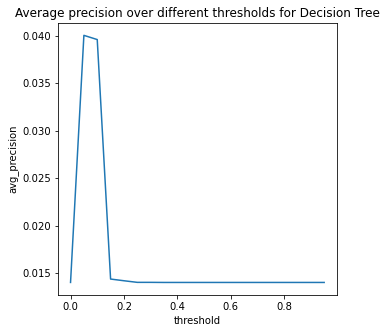

In [97]:
ax=sns.lineplot(comp['threshold'], comp['avg_precision'])
_=ax.set_title('Average precision over different thresholds for Decision Tree')

In [98]:
accuracy_score(y_val,pred)

0.9859980019561999

# Random Forest

In [72]:
rf_pipe_scale = make_pipeline(preprocess_trans_scale, RandomForestClassifier(max_features='sqrt', n_estimators=150))

rf_model = rf_pipe_scale.fit(X_train, y_train)

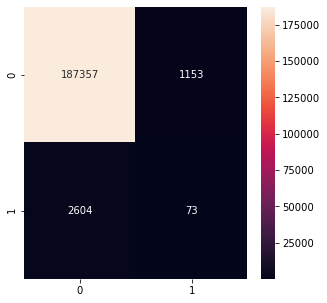

In [99]:
pred = rf_model.predict(X_val)
conf_matrix = confusion_matrix(y_val, pred)

sns.heatmap(conf_matrix, annot=True, fmt="d");

In [74]:
score_model('Random Forest', ['recall','precision', 'avg_precision'],
            y_val, pred)

,model,recall,precision,avg_precision
0,Random Forest,0.027269,0.059543,0.015244


In [ ]:
accuracy_score(y_val,pred)

In [75]:
param_grid = {'randomforestclassifier__max_features': ['auto','sqrt','log2'],
                'randomforestclassifier__n_estimators': [10,50,100,150]}
grid = GridSearchCV(rf_pipe_scale, param_grid, cv=3, n_jobs = 6, scoring= 'average_precision')
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Gender           False
custom_hr        False
custom_temp      False
custom_age       False
custom_o2stat    False
custom_bp        False
custom_resp      False
ICULOS            True
HospAdmTime       True
dtype...
custom_age        True
custom_o2stat     True
custom_bp         True
custom_resp       True
I

In [76]:
grid.best_params_

{'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 150}

In [87]:
eval_df = pd.DataFrame(rf_pipe_scale.predict_proba(X_val))

eval_df['actual'] = y_val

def eval_threshold(eval_df, t_list):
    output_df = pd.DataFrame()
    avg_pre_list = []
    for threshold in t_list:
        eval_df.loc[(eval_df[1] >=threshold), 'pred'] = 1 
        eval_df.loc[(eval_df[1] <threshold), 'pred'] = 0 
        avg_pre_list.append(average_precision_score(eval_df['actual'], 
                                                    eval_df['pred']))
    output_df['threshold'] = t_list
    output_df['avg_precision'] = avg_pre_list
    return output_df
    
comp = eval_threshold(eval_df, list(np.arange(0,1,0.05)))

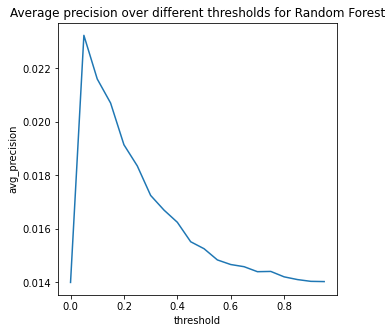

In [88]:
ax=sns.lineplot(comp['threshold'], comp['avg_precision'])
_=ax.set_title('Average precision over different thresholds for Random Forest')